<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Problemas de clasificación y  regresión.
* Selección de atributos y parámetros de regularización en regresión lineal (Ridge y Lasso).
* Validación cruzada.
* PCA versus LDA. Reducción de dimensionalidad para clasificación.
* Selección de hı́per-parámetros estructurales en Regresión Logı́stica, SVM.
* LDA, QDA, Naive Bayes en texto
* Clasificadores bayesianos ingenuos (Bernoulli, Multinomial)
* Preprocesamiento de datos brutos y representaciones de entrada.
 

** Formalidades **  
* Equipos de trabajo de: 2 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Se debe preparar una presentación de 20 minutos. Presentador será elegido aleatoriamente.
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega y discusión: 26 de Octubre y 29 de Octubre (13:00 PM)
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea1-INF393-II-2018]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Aprendizaje en regresión lineal  
[2.](#segundo) Análisis de audios como datos brutos  
[3.](#tercero) Análisis de emociones en tweets

## item 0 
lda y qda (fronteras de clasificacion)?

<a id="primero"></a>
## 1. Aprendizaje en regresión lineal.

buscar dataset entretenido...

predecir el desempeño (nota) que tendra un estudiante https://archive.ics.uci.edu/ml/datasets/Student+Performance (son muchas caract.)



Otra opcion: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/data ( pero no es lineal)

regularizacion en regresion lineal

selecc de atributos

cross validation

> Realice una regresión lineal de mı́nimos cuadrados básica. Explique la importancia/conveniencia del
paso 4 y los argumentos que se deben entregar a la función que implementa la regresión lineal.

> Construya una tabla con los pesos y Z-score correspondientes a cada predictor (variable). ¿Qué variables
están más correlacionadas con la respuesta? Si usáramos un nivel de significación del 5%. ¿Qué es lo
que observa y cuál puede ser la causa?

> a) Construya una función que implemente *Forward Step-wise Selection* (FSS). Es decir, partiendo con un
modelo sin predictores (variables), agregue un predictor a la vez, re-ajustando el modelo de regresión
en cada paso. Para seleccionar localmente una variable, proponga/implemente un criterio distinto al
utilizado en el código de ejemplo. Construya un gráfico que muestre el error de entrenamiento y el error
de pruebas como función del número de variables en el modelo. Ordene el eje $x$ de menor a mayor.

> b) Ajuste un modelo lineal utilizando “*Ridge Regression*”, es decir, regularizando con la norma $l_2$. Utilice valores del parámetro de regularización $\lambda$ en el rango [$10^7, 10^1$], variando si estima conveniente. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. (WARNING: Note que la lı́nea 3 y el primer argumento en la lı́nea 9
son crı́ticos).

> c) Ajuste un modelo lineal utilizando el método “*Lasso*”, es decir, regularizando con la norma $l_1$. Utilice valores del parámetro de regularización $\lambda$ en el rango [$10^0,10^{-3}$]. Para obtener el código, modifique las lı́neas 7 y 9 del ejemplo anterior. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. ¿Es más efectivo Lasso para
seleccionar atributos?

> d) Escogiendo uno de los dos métodos regularizadores anteriores, especificando el porqué, construya un
gráfico que muestre el error de entrenamiento y el error de pruebas como función del parámetro de
regularización. Discuta lo que observa.

> e) Estime el valor del parámetro de regularización en alguno de los modelos anteriores haciendo uso de
la técnica validación cruzada con un número de folds igual a $K= 5$ y $K = 10$. Recuerde que para que la estimación sea razonable, en cada configuración (*fold*) deberá reajustar los pesos del modelo. Mida el error real del modelo sobre el conjunto de pruebas, compare y concluya.


In [103]:
import pandas as pd
import numpy as np
df = pd.read_csv("student-mat.csv",delimiter=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [104]:
y = df["G3"]
df.drop(["G3","G2","G3","school"],axis=1,inplace=True)

(array([ 16.,   0.,   1.,  13.,  70., 201., 154., 112.,  65.,  17.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <a list of 10 Patch objects>)

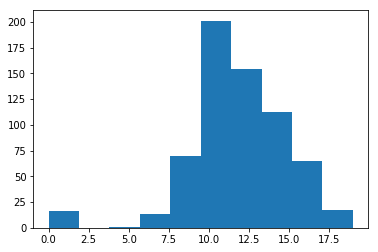

In [89]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(y)

In [105]:
nuevo_df  = pd.get_dummies(df, columns=["sex","address","famsize","Pstatus","Mjob","Fjob","reason","guardian",
                                       "schoolsup",'famsup','paid','activities','nursery','higher','internet',
                                        'romantic'])
X = nuevo_df.values
nuevo_df.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [107]:
from sklearn.linear_model import LinearRegression as LR
model = LR(fit_intercept=True, normalize=True, n_jobs=-1)
model.fit(X_train,y_train)
from sklearn.metrics import mean_squared_error
print("MSE TRAIN ",mean_squared_error(y_train, model.predict(X_train)))
print("MSE VAL ",mean_squared_error(y_test, model.predict(X_test)))

('MSE TRAIN ', 5.945490056818182)
('MSE VAL ', 7.834088740458015)


In [97]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=0.01, fit_intercept=True)
model.fit(X_train,y_train)

print("MSE TRAIN ",mean_squared_error(y_train, model.predict(X_train)))
print("MSE VAL ",mean_squared_error(y_test, model.predict(X_test)))

('MSE TRAIN ', 2.898541815715106)
('MSE VAL ', 3.353633217447514)


In [102]:
from sklearn.linear_model import Lasso
model = Lasso(alpha=10, fit_intercept=True)
model.fit(X_train,y_train)

print("MSE TRAIN ",mean_squared_error(y_train, model.predict(X_train)))
print("MSE VAL ",mean_squared_error(y_test, model.predict(X_test)))

('MSE TRAIN ', 10.327549958589055)
('MSE VAL ', 10.645529025442666)


(array([ 7.,  3., 12., 19., 42., 77., 55., 37.,  8.,  4.]),
 array([-7.75  , -6.3375, -4.925 , -3.5125, -2.1   , -0.6875,  0.725 ,
         2.1375,  3.55  ,  4.9625,  6.375 ]),
 <a list of 10 Patch objects>)

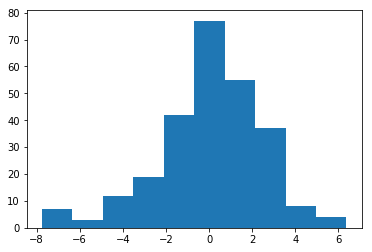

In [108]:
plt.hist(y_train-model.predict(X_train))

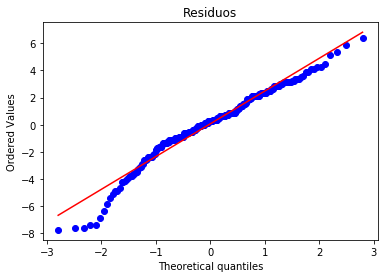

In [109]:
# QQplot
import pylab 
import scipy.stats as stats
  
stats.probplot(y_train-model.predict(X_train),dist="norm", plot=pylab)
pylab.title("Residuos")
pylab.show()

<a id="segundo"></a>
## 2. Análisis de audios como datos brutos

Distintos tipos de datos han sido tratados en el área de Machine Learning, donde el análisis de estos y
el manejo para poder dejarlos en una representación que se pueda entregar como entrada al algoritmo es
crucial. El manejo sobre los datos brutos se denomina pre-procesamiento y existen distintos dependiento del
tipo de datos y los distintos diminios de problemas, tales como imágenes, audios, texto.  
En esta actividad se trabajará con datos de audios los cuales son directamente extraı́dos desde datos fuentes
*.wav*, lo que corresponde a una señal de sonido en diferentes tiempos.

imagen

El *dataset* se denomina **Heartbeat Sounds** [3] y es presentado en la plataforma Kaggle a través del siguiente link... poner link ahi. Este dataset consta de grabaciones de sonidos de latidos cardı́acos normales y anormales, con distintas categorı́as para los latidos anormales. Para la tarea se trabajará con el *dataset A* presente en la data, el cual corresponde a datos generados desde la vı́a pública mediante la aplicación de Iphone iStethoscope Pro. El objetivo será el de clasificar cada sonido como latido cardı́aco normal o una de las las subcategorı́as de anormal (*Murmur, Extra Heart Sound, Artifact*), por lo que se trata de un problema de clasificación múltiple con 4 clases. Las distintas clasificaciones para los sonidos son explicadas en el sitio de Kaggle.

Para leer y trabajar los archivos de extensión .wav se utilizará el siguiente código:
```python
from scipy.io import wavfile
def clean_filename(fname, string):
    file_name = fname.split('/')[1]
    if file_name[:2] == '__':
        file_name = string + file_name
    return file_name
SAMPLE_RATE = 44100
def load_wav_file(name, path):
    s, b = wavfile.read(path + name)
    assert s == SAMPLE_RATE
    return b
```

> a) Construya un dataframe con los datos a analizar. Describa el dataset y determine cuántos registros hay
por clase.
```python
import pandas as pd
import numpy as np
df = pd.read_csv('./heartbeat-sounds/set_a.csv')
```

> b) Lea los archivos *.wav* y transformelos en secuencias de tiempo. Realice un *padding* de ceros al final de cada secuencia para que todas queden representadas con la misma cantidad de elementos, explique la
importancia de realizar este paso.
```python
def padd_zeros(array,length):
    aux = np.zeros(length)
    aux[:array.shape[0]] = array
    return aux
new_df =pd.DataFrame({'file_name' : df['fname'].apply(clean_filename,string='Aunlabelled')})
new_df['time_series'] = new_df['file_name'].apply(load_wav_file, path='path/to/set_a/')
new_df['len_series'] = new_df['time_series'].apply(len)
new_df['time_series']=new_df['time_series'].apply(padd_zeros,length=max(new_df['len_series']))
```
> c) Manipule los datos y cambie las etiquetas de los audios por otras asignadas por un doctor experto [4],
el cual afirma que estos cambios son requeridos. Vuelva a determinar cuántos registros hay por clase.
Nótese que ahora son 3 clases ¿Explique la problemática de tener etiquetas mal asignadas en los datos?
¿Un solo dato puede afectar esto?
```python
new_labels =...
labels = ['artifact','normal/extrahls', 'murmur']
new_df['target'] = [labels[i] for i in new_labels]
```

> d) Codifique las distintas clases a valores numéricos para que puedan ser trabajados por los algoritmos
clasificadores.
```python
new_df["target"] = new_df["target"].astype('category')
cat_columns = new_df.select_dtypes(['category']).columns
new_df[cat_columns] = new_df[cat_columns].apply(lambda x: x.cat.codes)
```

> e) Desordene los datos, evitando ası́ el orden en el que vienen la gran mayorı́a de las etiquetas. Cree la
matriz que conforma a los datos en sus dimensiones sin preprocesar, es decir, cada ejemplo es una
secuencia de amplitudes en el tiempo. ¿Las dimensiones de ésta indica que puede generar problemas?
¿De qué tipo?
```python
new_df = new_df.sample(frac=1,random_state=44)
X = np.stack(new_df['time_series'].values, axis=0)
y = new_df.target.values
X.shape
```

> f) Para pre procesar la secuencia en el tiempo realice una transformada de fourier discreta [5] para pasar
los datos desde el dominio de tiempos al dominio de frecuencias presentes en la señal de sonido.
```python
X_fourier = np.abs(np.fft.fft(X))
```

> g) Para seguir con el pre procesamiento realice un muestreo representativo de los datos a través de una
técnica de muestreo especializada en secuencias ¿En qué beneficia este paso? ¿Cómo podrı́a determinar
si el muestro es representativo?

```python
from scipy import signal
X_resampled = []
for i in range(X_fourier.shape[0]):
sequence = X_fourier[i,:].copy()
resampled_sequence = signal.resample(sequence, 100000)
X_resampled.append(resampled_sequence)
X_resampled = np.array(X_resampled)
X_resampled.shape
```

> h) Genere un conjunto de pruebas mediante la técnica hold-out validation para verificar la calidad de los
```pyhon
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y,
test_size=0.25, random_state=42)
```
> i) Realice un proceso de estandarizar los datos para ser trabajados adecuadamente. Recuerde que solo se
debe ajustar (calcular media y desviación estándar) con el conjunto de entrenamiento.
```python
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean=True, with_std=True)
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)
```
> j) Realice una reducción de dimensionalidad a través de la técnica PCA, para representar los datos en
d = 2 dimensiones. Recuerde que solo se debe ajustar (encontrar las componentes principales) con el
conjunto de entrenamiento. Visualice apropiadamente la proyección en 2 dimensiones.
```python
from sklearn.decomposition import PCA
d=2
pca_model = PCA(n_components=d)
pca_model.fit(X_train)
X_pca_train = pca_model.transform(X_train)
X_pca_test = pca_model.transform(X_test)
```

> k) Entrene un modelo de Regresión Logı́stica variando el parámetro de regularizacion C construyendo un
gráfico resumen del error en función de este hiper-parámetro. Además entrene una Máquina de Soporte
Vectorial (SVM) con kernel lineal, variando el hiper-parámetro de regularizacion *C* en el mismo rango
que para la Regresión Logı́stica, construyendo el mismo gráfico resumen. Compare.
```python
Cs = [0.0001,0.01,0.1,1,10,100,1000]
```

> l) Quizás SVM?
```python
cs tambn
```

> m) Experimente con diferentes dimensiones d para la proyección de PCA con el propósito de obtener un
modelo con menor error. Construya una tabla o gráfico resumen.

> n) Realice otra reducción de dimensionalidad ahora a través de la técnica LDA, para representar los datos
en d = 2 dimensiones. Recuerde que sólo se debe ajustar con el conjunto de entrenamiento, si se muestra
un warning explique el porqué. Visualice apropiadamente la proyección en 2 dimensiones.
```python
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
model_lda = LDA(n_components=2)
model_lda.fit(X_train,y_train)
X_pca_train = model_lda.transform(X_train)
X_pca_test = model_lda.transform(X_test)
```

> o) Con el propósito de encontrar el mejor modelo vuelva a realizar el item h) con el i) en el nuevo espacio
generado por la representación según las d dimensiones de la proyección LDA. Esta nueva representación
¿mejora o empeora el desempeño? Explique.

> p) Intente mejorar el desempeño de los algoritmos ya entrenados. Diseñe ahora sus propias cracterı́sticas
(feature crafting) a partir de los datos brutos (secuencia de amplitudes), puede inspirarse en otros
trabajos [6] [7] si desea.

<a id="tercero"></a>
## 3. Análisis de emociones en *tweets*


Pharagraph vector (señalar ideas)

ver la predicción jerárquica (señalarles como ideas)